In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# === 1. Carregar o dataset ===
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

In [3]:
# === 2. Preparar os dados ===
X = df.drop('quality', axis=1)
y = df['quality']

# Transformar qualidade em 3 classes: baixa (3-5), média (6), alta (7-8)
y_class = y.apply(lambda q: 0 if q <= 5 else (1 if q == 6 else 2))

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

# Escalonar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encoding dos rótulos
y_train_cat = tf.keras.utils.to_categorical(y_train, 3)
y_test_cat = tf.keras.utils.to_categorical(y_test, 3)

In [4]:
# === 3. Construir o modelo ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# === 4. Compilar e treinar ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                    epochs=50, batch_size=32, verbose=2)

Epoch 1/50
40/40 - 4s - 102ms/step - accuracy: 0.3948 - loss: 1.1675 - val_accuracy: 0.5688 - val_loss: 0.9631
Epoch 2/50
40/40 - 0s - 5ms/step - accuracy: 0.5348 - loss: 0.9537 - val_accuracy: 0.6062 - val_loss: 0.8496
Epoch 3/50
40/40 - 0s - 4ms/step - accuracy: 0.5661 - loss: 0.8807 - val_accuracy: 0.6250 - val_loss: 0.7901
Epoch 4/50
40/40 - 0s - 4ms/step - accuracy: 0.5731 - loss: 0.8604 - val_accuracy: 0.6187 - val_loss: 0.7603
Epoch 5/50
40/40 - 0s - 4ms/step - accuracy: 0.5950 - loss: 0.8476 - val_accuracy: 0.6313 - val_loss: 0.7430
Epoch 6/50
40/40 - 0s - 4ms/step - accuracy: 0.5966 - loss: 0.8257 - val_accuracy: 0.6375 - val_loss: 0.7315
Epoch 7/50
40/40 - 0s - 4ms/step - accuracy: 0.6020 - loss: 0.8106 - val_accuracy: 0.6469 - val_loss: 0.7286
Epoch 8/50
40/40 - 0s - 5ms/step - accuracy: 0.6083 - loss: 0.7976 - val_accuracy: 0.6438 - val_loss: 0.7211
Epoch 9/50
40/40 - 0s - 7ms/step - accuracy: 0.6231 - loss: 0.7900 - val_accuracy: 0.6438 - val_loss: 0.7192
Epoch 10/50
40/40

In [6]:
# === 5. Avaliar ===
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Acurácia no teste: {accuracy:.2%}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6902 - loss: 0.6621 

✅ Acurácia no teste: 66.25%


In [7]:
# === 6. Relatório de classificação ===
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=['Baixa', 'Média', 'Alta']))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

       Baixa       0.73      0.82      0.77       149
       Média       0.58      0.56      0.57       128
        Alta       0.60      0.42      0.49        43

    accuracy                           0.66       320
   macro avg       0.64      0.60      0.61       320
weighted avg       0.66      0.66      0.66       320



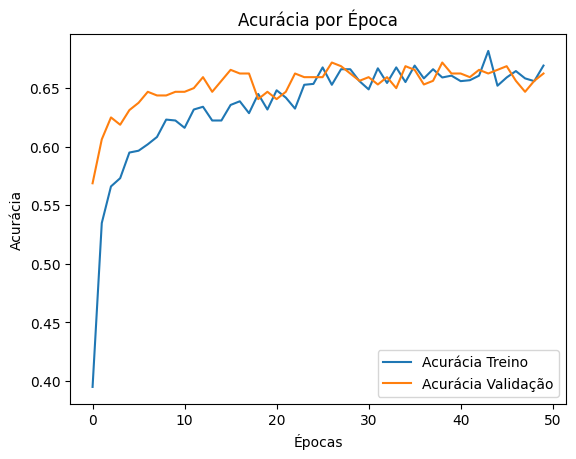

In [8]:
# === 7. Curvas de treino ===
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()